In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs
import numpy as np
import numpy.ma as ma
import cmocean as cmo

import cartopy
import shapely.geometry as sgeom
from cartopy.geodesic import Geodesic

import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
### Define functions
def divide_longitude(lons, lats, var):
    '''Split data into sections east and west of the prime meridian'''
    
    lons_greater = ma.masked_greater(lons, -0.01)
    lons_lesser = ma.masked_less(lons, 0.)

    lats_greater = ma.MaskedArray(lats, mask=lons_greater.mask)
    lats_lesser = ma.MaskedArray(lats, mask=lons_lesser.mask)

    var_greater = ma.MaskedArray(var, mask=lons_greater.mask)
    var_lesser = ma.MaskedArray(var, mask=lons_lesser.mask)
    
    return lons_greater, lons_lesser, lats_greater, lats_lesser, var_greater, var_lesser

def mask_land(lons, lats, bathy, var):
    '''Mask land (elevation above zero)'''
    
    bathy_land = ma.masked_greater(bathy, 0.)
    lons_land = ma.MaskedArray(lons, mask=bathy_land.mask)
    lats_land = ma.MaskedArray(lats, mask=bathy_land.mask)
    var_land = ma.MaskedArray(var, mask=bathy_land.mask)
    
    return lons_land, lats_land, var_land

In [3]:
topo = xr.open_dataset('/nethome/5867800/grid/adapted_bathymetry.nc')
lats = topo.variables['T_LAT_2D'][:,:]
lons = topo.variables['T_LON_2D'][:,:]
latsu = topo.variables['U_LAT_2D'][:,:]
lonsu = topo.variables['U_LON_2D'][:,:]
bathy = topo.variables['Bathymetry'][:,:]

# General settings

In [4]:
### Settings plot
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
projection = ccrs.NearsidePerspective(central_latitude=-67, central_longitude=-20, satellite_height=1500000)

In [5]:
x696p, y696p = -42.933067, -61.849083 # present-day
x696, y696 = -57., -67.5 #-51.4439, -60.9402 # paleo lon/lat from Gplates Scotia (plate ID 2336)

# Release locations

In [6]:
# Forwards (bathymetry)
lonf = np.array([-55., -50., -45., -40., -35., -30., -25., -20.,
                 -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,
                  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,
                 -57.82330253, -59.25, -60.08662877, -60.01036191, -58.82106809])
latf = np.array([-77.99537227, -78.45787684, -79.17977465, -79.75459498, -79.99027112, -80.07689735, -79.9997914 , -80.12097168,
                 -79.24559138, -78.39033646, -77.33178711, -76.13251966, -75.17986379, -74.68456009, -73.6896764 , -73.53134648,
                 -72.9724492 , -72.3117251 , -72.29006817, -72.16268516, -70.86573029, -68.58359528, -68.58359528, -66.59729004,
                 -77.        , -75.        , -73.        , -71.        , -69.        ])

# Backwards
lonsib = np.array([-57.04998779, -57.0249939, -57., -56.9750061, -56.95001221,
                   -57.04998779, -57.0249939, -57., -56.9750061, -56.95001221,
                   -57.04998779, -57.0249939, -57., -56.9750061, -56.95001221,
                   -57.04998779, -57.0249939, -57., -56.9750061, -56.95001221,
                   -57.04998779, -57.0249939, -57., -56.9750061, -56.95001221])
latsib = np.array([-67.5270462, -67.5270462, -67.5270462, -67.5270462, -67.5270462,
                   -67.5164814, -67.5164814, -67.5164814, -67.5164814, -67.5164814,
                   -67.5059166, -67.5059166, -67.5059166, -67.5059166, -67.5059166,
                   -67.49535179, -67.49535179, -67.49535179, -67.49535179, -67.49535179,
                   -67.48478699, -67.48478699, -67.48478699, -67.48478699, -67.48478699])

## Position ODP Site 696

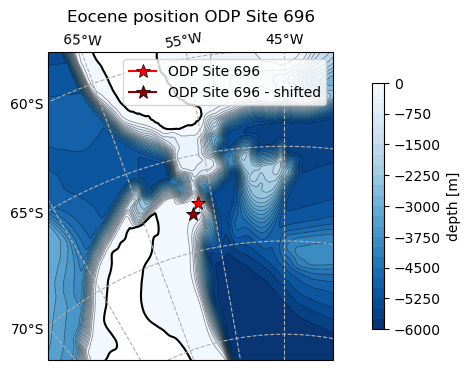

In [7]:
### Plot fields and icebergs
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=-45)}, figsize=(10,4))
ax.set_title(f'Eocene position ODP Site 696')
ax.set_extent([-70,-40,-75,-60])

gl0 = ax.gridlines(linestyle='--', draw_labels=True, x_inline=False, y_inline=False, crs=ccrs.PlateCarree())
gl0.xlocator = mticker.FixedLocator(np.arange(-65,-35,10))
gl0.ylocator = mticker.FixedLocator([])
gl0.right_labels = True
gl0.bottom_labels = False
gl0.left_labels = True
gl0.top_labels = True
gl0.ylabel_style = {'rotation':0}

gl1 = ax.gridlines(linestyle='--', draw_labels=True, x_inline=False, y_inline=False, crs=ccrs.PlateCarree())
gl1.xlocator = mticker.FixedLocator(np.arange(-85,-65,10))
gl1.ylocator = mticker.FixedLocator([])
gl1.right_labels = False
gl1.bottom_labels = False
gl1.left_labels = True
gl1.top_labels = False

gl2 = ax.gridlines(linestyle='--', draw_labels=True, x_inline=False, y_inline=False, crs=ccrs.PlateCarree())
gl2.xlocator = mticker.FixedLocator([])
gl2.ylocator = mticker.FixedLocator(np.arange(-75,-55,5))
gl2.right_labels = False
gl2.bottom_labels = True
gl2.left_labels = True
gl2.top_labels = False
gl2.ylabel_style = {'rotation':0}

# Bathymetry
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
im = ax.contourf(lonsg, latsg, varg, levels=range(-6000,1,250), cmap="Blues_r", transform=ccrs.PlateCarree())
im = ax.contourf(lonsl, latsl, varl, levels=range(-6000,1,250), cmap="Blues_r", transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, shrink=0.8, label="depth [m]")
ax.contour(lonsg, latsg, varg, levels=range(-6000,1,250), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())
ax.contour(lonsl, latsl, varl, levels=range(-6000,1,250), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())

# Coastlines
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

# ODP 696
ax.plot(x696, y696, color='r', marker='*', markersize=10, markeredgecolor='black',
        markeredgewidth=.5, transform=ccrs.PlateCarree(), label='ODP Site 696')
ax.plot(x696-1., y696-0.5, color='darkred', marker='*', markersize=10, markeredgecolor='black',
        markeredgewidth=.5, transform=ccrs.PlateCarree(), label='ODP Site 696 - shifted')

plt.legend()
plt.show()

In [8]:
x696-1., y696-0.5

(-58.0, -68.0)

## Forwards

Select contours

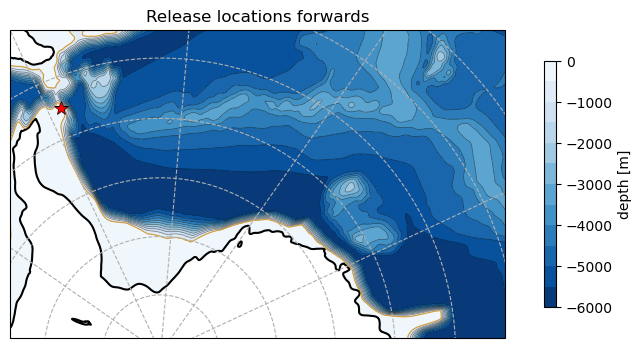

In [9]:
### Plot fields and icebergs
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=-35)}, figsize=(10,4))
ax.set_title(f'Release locations forwards')
ax.set_extent([-60,40,-85,-60]) #-10
ax.gridlines(linestyle='--')

# Bathymetry
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
im = ax.contourf(lonsg, latsg, varg, levels=range(-6000,1,500), cmap="Blues_r", transform=ccrs.PlateCarree())
im = ax.contourf(lonsl, latsl, varl, levels=range(-6000,1,500), cmap="Blues_r", transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, shrink=0.8, label="depth [m]")
ax.contour(lonsg, latsg, varg, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())
ax.contour(lonsl, latsl, varl, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())

# Coastlines
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

# Test
cs1 = ax.contour(lonsg, latsg, varg, levels=[-500], linewidths=1, alpha=0.5, colors="orange", linestyles='-', transform=ccrs.PlateCarree())
cs2 = ax.contour(lonsl, latsl, varl, levels=[-500], linewidths=1, alpha=0.5, colors="orange", linestyles='-', transform=ccrs.PlateCarree())

# ODP 696
ax.plot(x696, y696, color='r', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())

plt.show()

In [10]:
# ### Plot fields and icebergs
# fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15,4))
# ax.set_title(f'Release locations forwards')
# ax.set_extent([-80,80,-85,-60])
# ax.gridlines(linestyle='--')

# # Bathymetry
# lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
# im = ax.contourf(lonsg, latsg, varg, levels=range(-6000,1,500), cmap="Blues_r", transform=ccrs.PlateCarree())
# im = ax.contourf(lonsl, latsl, varl, levels=range(-6000,1,500), cmap="Blues_r", transform=ccrs.PlateCarree())
# plt.colorbar(im, ax=ax, shrink=0.8, label="depth [m]")
# ax.contour(lonsg, latsg, varg, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())
# ax.contour(lonsl, latsl, varl, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())

# # Coastlines
# lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
# ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
# ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

# # Test
# cs1 = ax.contour(lonsg, latsg, varg, levels=[-500], linewidths=1, alpha=0.5, colors="orange", linestyles='-', transform=ccrs.PlateCarree())
# cs2 = ax.contour(lonsl, latsl, varl, levels=[-500], linewidths=1, alpha=0.5, colors="orange", linestyles='-', transform=ccrs.PlateCarree())

# # ODP 696
# ax.plot(x696, y696, color='r', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())

# plt.show()

In [11]:
p1 = cs1.collections[0].get_paths()[0]
v1 = p1.vertices
x1 = v1[:,0]
y1 = v1[:,1]

p2 = cs2.collections[0].get_paths()[0]
v2 = p2.vertices
x2 = v2[:,0]
y2 = v2[:,1]

In [12]:
xs = np.concatenate((x1, x2))
ys = np.concatenate((y1, y2))

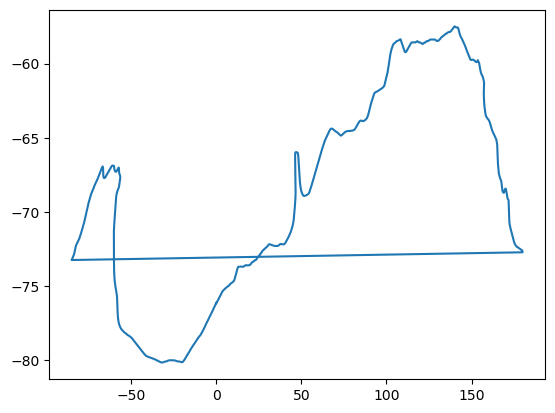

In [13]:
# Extracted contour
plt.plot(xs, ys);

Plot contour on map to compare to present-day

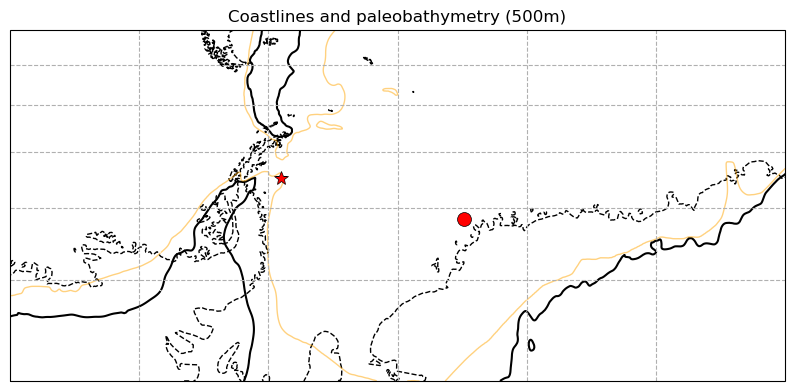

In [14]:
### Plot fields and icebergs
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Mercator()}, figsize=(10,8))
ax.set_title(f'Coastlines and paleobathymetry (500m)')
ax.set_extent([-120,60,-90,-50]) #-10
ax.gridlines(linestyle='--')

# Coastlines
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

ax.coastlines(linestyle='--')

# # Release locations
# ax.scatter(lonf, latf, transform=ccrs.PlateCarree(), color='y', zorder=10)

# Test
cs1 = ax.contour(lonsg, latsg, varg, levels=[-500], linewidths=1, alpha=0.5, colors="orange", linestyles='-', transform=ccrs.PlateCarree())
cs2 = ax.contour(lonsl, latsl, varl, levels=[-500], linewidths=1, alpha=0.5, colors="orange", linestyles='-', transform=ccrs.PlateCarree())

# ODP 696
ax.plot(x696, y696, color='r', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())

# ODP 693
plt.plot(-14.5735, -70.831533, color='r', marker='o', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())

# plt.plot([45, 45], [-90, -60], color='b', transform=ccrs.PlateCarree())

plt.show()

Find present day 'range' of Carter region and translate to paleo: load GEBCO bathymetry data from present-day and make into meshgrid

In [15]:
geb = xr.open_dataset('/nethome/5867800/grid/gebco_2022_long.nc')
glat = geb.variables['lat'][:]
glon = geb.variables['lon'][:]
gbath = geb.variables['elevation'][:,:]

In [16]:
glons, glats = np.meshgrid(glon, glat)

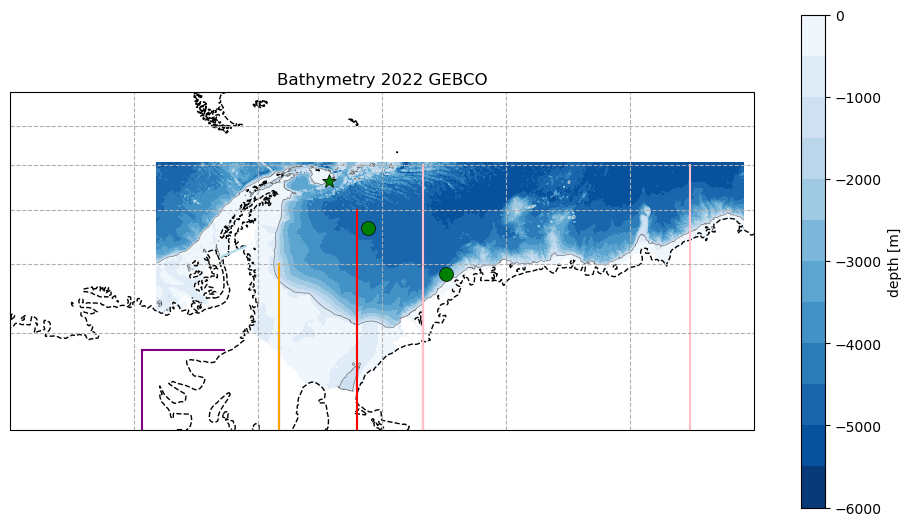

In [17]:
### Plot fields and icebergs
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Mercator()}, figsize=(12,8))
ax.set_title(f'Bathymetry 2022 GEBCO')
ax.set_extent([-120,60,-90,-50]) #-10
ax.gridlines(linestyle='--')

# Bathymetry
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(glons, glats, gbath)
im = ax.contourf(lonsg, latsg, varg, levels=range(-6000,1,500), cmap="Blues_r", transform=ccrs.PlateCarree())
im = ax.contourf(lonsl, latsl, varl, levels=range(-6000,1,500), cmap="Blues_r", transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, shrink=0.8, label="depth [m]")
ax.contour(lonsg, latsg, varg, levels=[-1000], linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())
ax.contour(lonsl, latsl, varl, levels=[-1000], linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())

# # # Coastlines
# lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(glons, glats, gbath)
# ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='b')
# ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='b')

ax.coastlines(linestyle='--')

# # Release locations
# ax.scatter(lonf, latf, transform=ccrs.PlateCarree(), color='y', zorder=10)

# Test
# cs1 = ax.contour(lonsg, latsg, varg, levels=[-500], linewidths=1, alpha=0.5, colors="orange", linestyles='-', transform=ccrs.PlateCarree())
# cs2 = ax.contour(lonsl, latsl, varl, levels=[-500], linewidths=1, alpha=0.5, colors="orange", linestyles='-', transform=ccrs.PlateCarree())

# ODP 696
plt.plot(-42.933267, -61.849317, color='g', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())
# ODP 694
plt.plot(-33.4465, -66.84715, color='g', marker='o', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())
# ODP 693
plt.plot(-14.57435, -70.831467, color='g', marker='o', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())

# North Grahamland base
plt.plot([-68.822222, -62.933333], [-69.401111, -68.483333], color='lightblue', transform=ccrs.PlateCarree())

# Ellsworth mountain borders
plt.plot([-88.14, -68.14], [-76.05, -76.05], color='purple', transform=ccrs.PlateCarree())
plt.plot([-88.14, -88.14], [-90, -76.05], color='purple', transform=ccrs.PlateCarree())
plt.plot([-55., -55.], [-90, -75], color='purple', transform=ccrs.PlateCarree())

# Filchner Ice Shelf borders
plt.plot([-55., -55.], [-90, -70], color='orange', transform=ccrs.PlateCarree())
plt.plot([-36., -36.], [-90, -70], color='orange', transform=ccrs.PlateCarree())

# Coats Land borders
plt.plot([-36., -36.], [-90, -65], color='red', transform=ccrs.PlateCarree())
plt.plot([-20., -20.], [-90, -65], color='red', transform=ccrs.PlateCarree())

# Dronning Maud Land borders
plt.plot([-20., -20.], [-90, -60], color='pink', transform=ccrs.PlateCarree())
plt.plot([44.633333, 44.633333], [-90, -60], color='pink', transform=ccrs.PlateCarree())

plt.show()

Select ranges Eocene

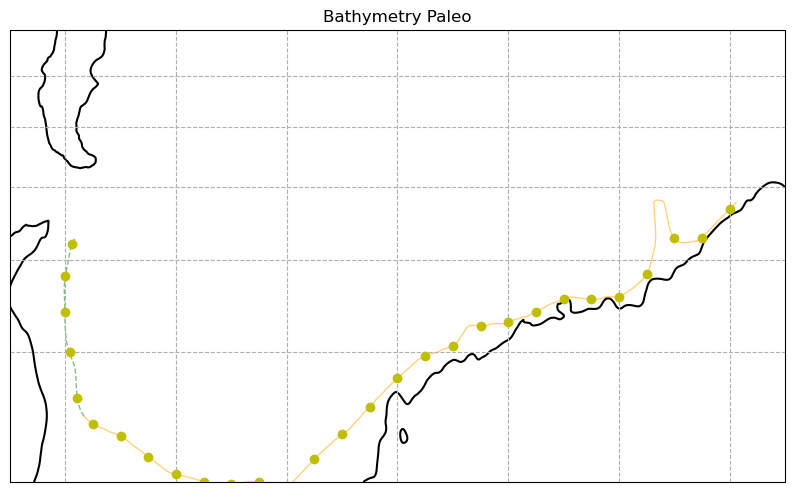

In [18]:
### Plot fields and icebergs
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Mercator(central_longitude=-20)}, figsize=(10,8))
ax.set_title(f'Bathymetry Paleo')
ax.set_extent([-70,70,-90,-50], ccrs.PlateCarree())
ax.gridlines(linestyle='--')

# Coastlines
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

# # Release locations
ax.scatter(lonf, latf, transform=ccrs.PlateCarree(), color='y', zorder=10)

# Test
ax.plot(xs[:725], ys[:725], linewidth=1, alpha=0.5, color="orange", linestyle='-', transform=ccrs.PlateCarree())
ax.plot(xs[-1000:], ys[-1000:], linewidth=1, alpha=0.5, color="orange", linestyle='-', transform=ccrs.PlateCarree())
ax.plot(xs[725:1000], ys[725:1000], linewidth=1, alpha=0.5, color="green", linestyle='--', transform=ccrs.PlateCarree())

plt.show()

In [19]:
(xs[725], ys[725]), (xs[-1000], ys[-1000]), (xs[1000], ys[1000])

((-56.60075801036318, -77.71214294433594),
 (61.14999771118164, -66.16668285614725),
 (-57.95001220703125, -68.55434345096917))

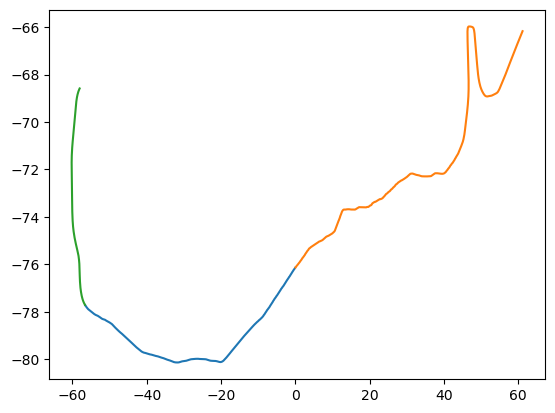

In [20]:
plt.plot(xs[:725], ys[:725])
plt.plot(xs[-1000:], ys[-1000:])
plt.plot(xs[725:1000], ys[725:1000]);

Equal horizontal distance ...

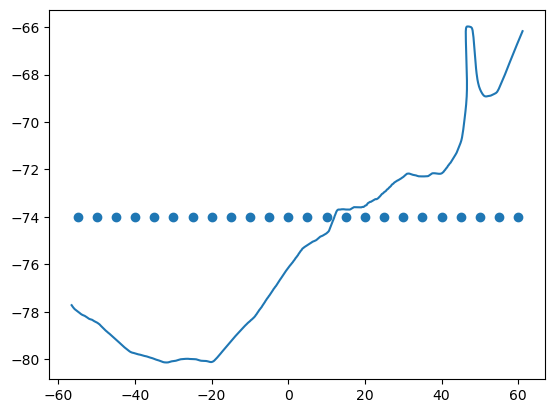

In [21]:
xcoast = np.concatenate((xs[-1000:], xs[:725]))
ycoast = np.concatenate((ys[-1000:], ys[:725]))

plt.plot(xcoast, ycoast)
plt.scatter(np.arange(-55, 60+5, 5), np.ones(len(np.arange(-55, 60+5, 5)))*-74.);

... and vertical distance

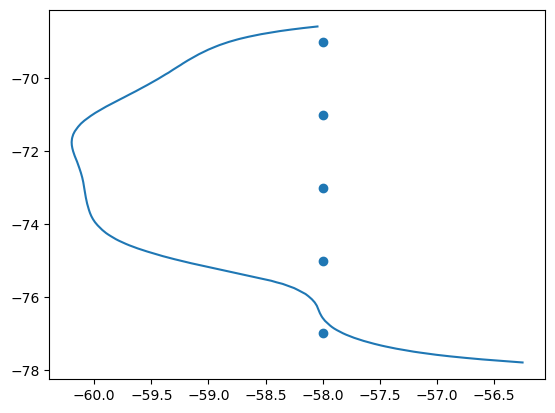

In [22]:
xcoastv = xs[720:1000]
ycoastv = ys[720:1000]

plt.plot(xcoastv, ycoastv)
plt.scatter(np.ones(len(np.arange(-77, -67.5-.5, 2)))*-58., np.arange(-77, -67.5-.5, 2));

Interpolate (find nearest, roughtly equal spacing)

In [23]:
xtest = np.arange(-55, 60+5, 5) # 24 samples
xtest

array([-55, -50, -45, -40, -35, -30, -25, -20, -15, -10,  -5,   0,   5,
        10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60])

In [24]:
ytestv = np.arange(-77, -67.5-.5, 2) # 5 samples
ytestv

array([-77., -75., -73., -71., -69.])

In [25]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [26]:
ytest = np.zeros(len(xtest))
for j, xc in enumerate(xtest):
    i = find_nearest(xcoast, xc)
    ytest[j] = ycoast[i]

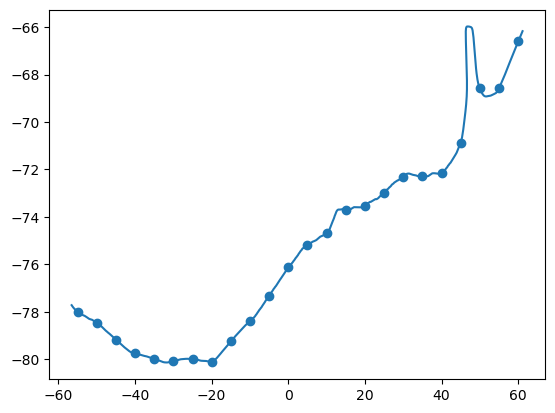

In [27]:
plt.plot(xcoast, ycoast)
plt.scatter(xtest, ytest);

In [28]:
xtestv = np.zeros(len(ytestv))
for j, yc in enumerate(ytestv):
    i = find_nearest(ycoastv, yc)
    xtestv[j] = xcoastv[i]

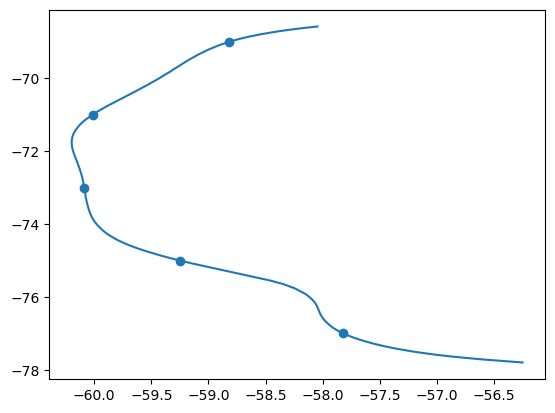

In [29]:
plt.plot(xcoastv, ycoastv)
plt.scatter(xtestv, ytestv);

Total release locations:

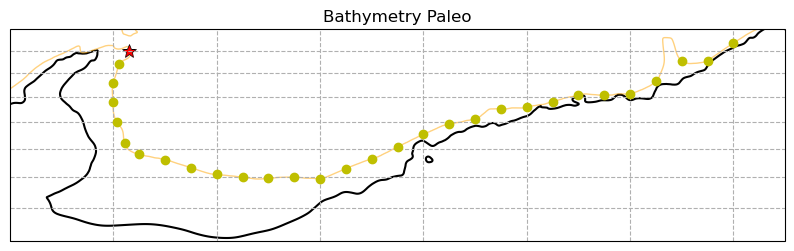

In [30]:
### Plot fields and icebergs
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Miller(central_longitude=-20)}, figsize=(10,8))
ax.set_title(f'Bathymetry Paleo')
ax.set_extent([-80,70,-85,-65], ccrs.PlateCarree())
ax.gridlines(linestyle='--')

# Coastlines
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

## Release locations
ax.scatter(xtest, ytest, transform=ccrs.PlateCarree(), color='y', zorder=10)
ax.scatter(xtestv, ytestv, transform=ccrs.PlateCarree(), color='y', zorder=10)

# Test
cs1 = ax.contour(lonsg, latsg, varg, levels=[-500], linewidths=1, alpha=0.5, colors="orange", linestyles='-', transform=ccrs.PlateCarree())
cs2 = ax.contour(lonsl, latsl, varl, levels=[-500], linewidths=1, alpha=0.5, colors="orange", linestyles='-', transform=ccrs.PlateCarree())

# ODP 696 paleo
ax.plot(x696, y696, color='r', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())

plt.show()

In [31]:
xcoor = np.concatenate((xtest, xtestv))
ycoor = np.concatenate((ytest, ytestv))
xcoor, ycoor, len(xcoor)

(array([-55.        , -50.        , -45.        , -40.        ,
        -35.        , -30.        , -25.        , -20.        ,
        -15.        , -10.        ,  -5.        ,   0.        ,
          5.        ,  10.        ,  15.        ,  20.        ,
         25.        ,  30.        ,  35.        ,  40.        ,
         45.        ,  50.        ,  55.        ,  60.        ,
        -57.82330253, -59.25      , -60.08662877, -60.01036191,
        -58.82106809]),
 array([-77.99537227, -78.45787684, -79.17977465, -79.75459498,
        -79.99027112, -80.07689735, -79.9997914 , -80.12097168,
        -79.24559138, -78.39033646, -77.33178711, -76.13251966,
        -75.17986379, -74.68456009, -73.6896764 , -73.53134648,
        -72.9724492 , -72.3117251 , -72.29006817, -72.16268516,
        -70.86573029, -68.58359528, -68.58359528, -66.59729004,
        -77.        , -75.        , -73.        , -71.        ,
        -69.        ]),
 29)

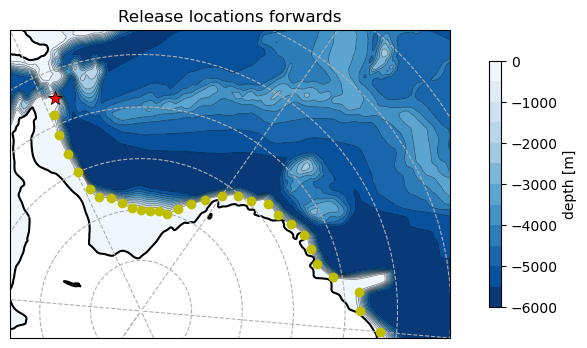

In [32]:
### Plot fields and icebergs
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=-35)}, figsize=(10,4))
ax.set_title(f'Release locations forwards')
ax.set_extent([-60,60,-90,-60]) #-10
ax.gridlines(linestyle='--')

# Bathymetry
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
im = ax.contourf(lonsg, latsg, varg, levels=range(-6000,1,500), cmap="Blues_r", transform=ccrs.PlateCarree())
im = ax.contourf(lonsl, latsl, varl, levels=range(-6000,1,500), cmap="Blues_r", transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, shrink=0.8, label="depth [m]")
ax.contour(lonsg, latsg, varg, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())
ax.contour(lonsl, latsl, varl, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())

# Coastlines
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

# Release locations
ax.scatter(xcoor, ycoor, transform=ccrs.PlateCarree(), color='y', zorder=10)

# ODP 696
ax.plot(x696, y696, color='r', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())

plt.show()

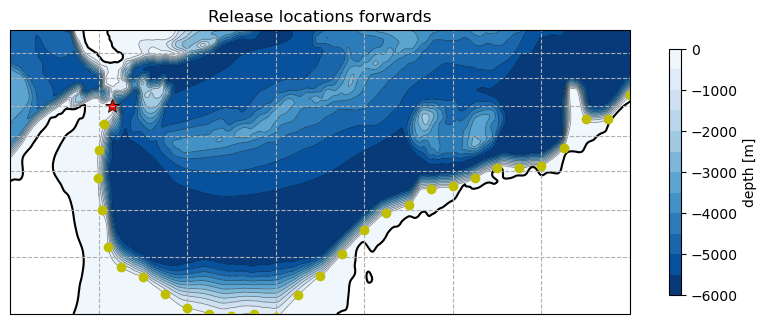

In [33]:
### Plot fields and icebergs
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Mercator(central_longitude=-35)}, figsize=(10,4))
ax.set_title(f'Release locations forwards')
ax.set_extent([-80,60,-90,-60]) #-10
ax.gridlines(linestyle='--')

# Bathymetry
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
im = ax.contourf(lonsg, latsg, varg, levels=range(-6000,1,500), cmap="Blues_r", transform=ccrs.PlateCarree())
im = ax.contourf(lonsl, latsl, varl, levels=range(-6000,1,500), cmap="Blues_r", transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, shrink=0.8, label="depth [m]")
ax.contour(lonsg, latsg, varg, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())
ax.contour(lonsl, latsl, varl, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())

# Coastlines
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

# Release locations
ax.scatter(xcoor, ycoor, transform=ccrs.PlateCarree(), color='y', zorder=10)

# ODP 696
ax.plot(x696, y696, color='r', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())

plt.show()

## Backwards

Select grid points around site

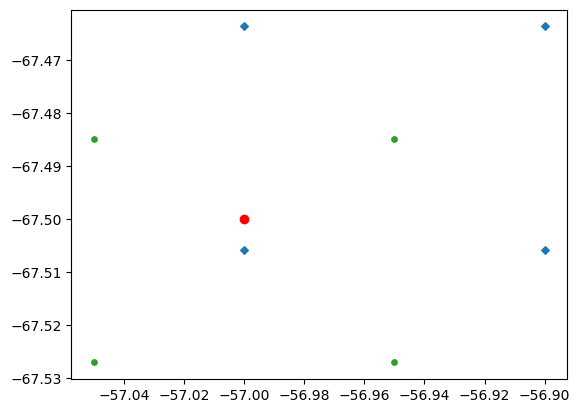

In [34]:
plt.scatter(lons[409:411,279:281], lats[409:411,279:281], color='tab:green', marker='o', s=15)
plt.scatter(lonsu[409:411,279:281], latsu[409:411,279:281], color='tab:blue', marker='D', s=15)
plt.scatter(x696, y696, color='r');

In [35]:
np.linspace(lons[409,279].data, lons[410,280].data, 5)

array([-57.04998779, -57.0249939 , -57.        , -56.9750061 ,
       -56.95001221])

In [36]:
np.linspace(lats[409,279].data, lats[410,280].data, 5)

array([-67.5270462 , -67.5164814 , -67.5059166 , -67.49535179,
       -67.48478699])

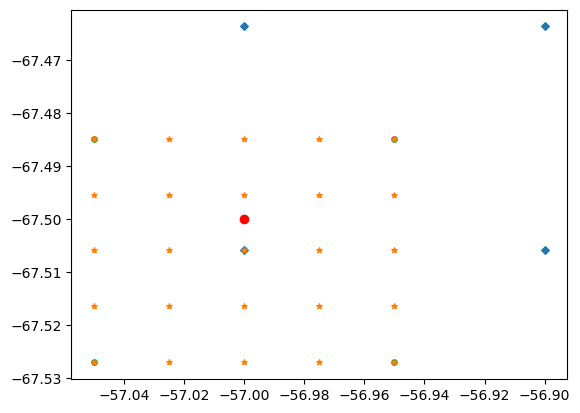

In [37]:
plt.scatter(lons[409:411,279:281], lats[409:411,279:281], color='tab:green', marker='o', s=15)
plt.scatter(lonsu[409:411,279:281], latsu[409:411,279:281], color='tab:blue', marker='D', s=15)
plt.scatter(lonsib, latsib, color='tab:orange', marker='*', s=15)
plt.scatter(x696, y696, color='r');

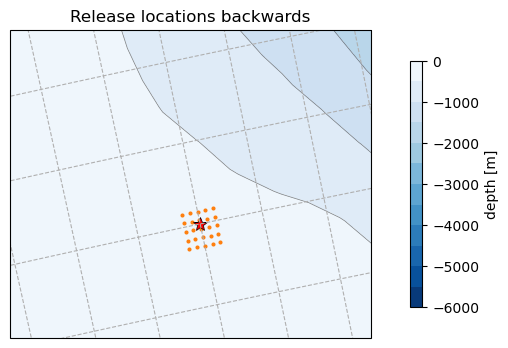

In [38]:
### Plot fields and icebergs
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=-45)}, figsize=(10,4))
ax.set_title(f'Release locations backwards')
ax.set_extent([-57.5,-56.5,-67.6,-67.3])
ax.gridlines(linestyle='--')

# Bathymetry
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
im = ax.contourf(lonsg, latsg, varg, levels=range(-6000,1,500), cmap="Blues_r", transform=ccrs.PlateCarree())
im = ax.contourf(lonsl, latsl, varl, levels=range(-6000,1,500), cmap="Blues_r", transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, shrink=0.8, label="depth [m]")
ax.contour(lonsg, latsg, varg, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())
ax.contour(lonsl, latsl, varl, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())

# Coastlines
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

# Release locations
# ax.scatter(lonsib, latsib, transform=ccrs.PlateCarree(), color='y', zorder=10)

# plt.scatter(lons[409:411,279:281], lats[409:411,279:281], color='tab:green', marker='o', s=15, transform=ccrs.PlateCarree())
# plt.scatter(lonsu[409:411,279:281], latsu[409:411,279:281], color='tab:blue', marker='D', s=15, transform=ccrs.PlateCarree())
plt.scatter(lonsib, latsib, color='tab:orange', marker='.', s=15, transform=ccrs.PlateCarree())
# plt.scatter(x696, y696, color='r');


# ODP 696
ax.plot(x696, y696, color='r', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())

plt.show()

## Overview release locations

/nethome/5867800/.conda/envs/py3_parcels/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


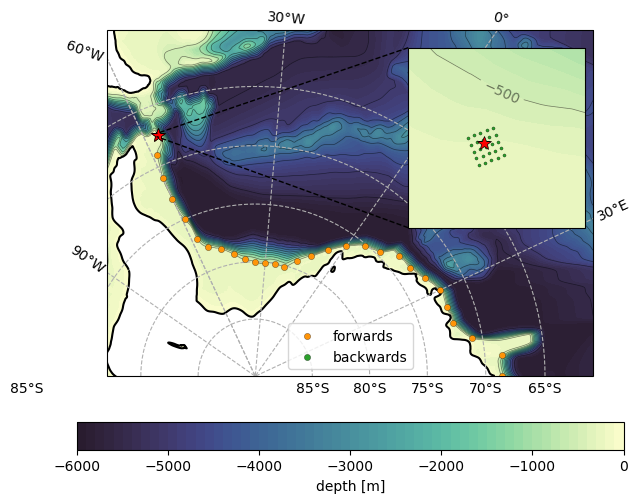

In [39]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=-35)}, figsize=(15,6))
# ax.set_title(f'Iceberg release locations')
ax.set_extent([-60,40,-90,-60], ccrs.PlateCarree()) #-10

gl0 = ax.gridlines(linestyle='--', draw_labels=True, x_inline=False, y_inline=False, crs=ccrs.PlateCarree())
gl0.xlocator = mticker.FixedLocator(np.arange(-60,35,30))
gl0.ylocator = mticker.FixedLocator([])
gl0.right_labels = True
gl0.bottom_labels = False
gl0.left_labels = True
gl0.top_labels = True

gl1 = ax.gridlines(linestyle='--', draw_labels=True, x_inline=False, y_inline=False, crs=ccrs.PlateCarree())
gl1.xlocator = mticker.FixedLocator(np.arange(-90,-55,30))
gl1.ylocator = mticker.FixedLocator([])
gl1.right_labels = False
gl1.bottom_labels = False
gl1.left_labels = True
gl1.top_labels = False

gl2 = ax.gridlines(linestyle='--', draw_labels=True, x_inline=False, y_inline=False, crs=ccrs.PlateCarree())
gl2.xlocator = mticker.FixedLocator([])
gl2.ylocator = mticker.FixedLocator(np.arange(-70,-64,5))
gl2.right_labels = False
gl2.bottom_labels = True
gl2.left_labels = False
gl2.top_labels = False
gl2.ylabel_style = {'rotation':0}

gl3 = ax.gridlines(linestyle='--', draw_labels=True, x_inline=False, y_inline=False, crs=ccrs.PlateCarree())
gl3.xlocator = mticker.FixedLocator([])
gl3.ylocator = mticker.FixedLocator(np.arange(-90,-74,5))
gl3.right_labels = False
gl3.bottom_labels = True
gl3.left_labels = False
gl3.top_labels = False
gl3.ylabel_style = {'rotation':0}


# Bathymetry
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
im = ax.contourf(lonsg[:800,:], latsg[:800,:], varg[:800,:], levels=range(-6000,1,100), cmap=cmo.cm.deep_r, transform=ccrs.PlateCarree())
im = ax.contourf(lonsl[:780,:1400], latsl[:780,:1400], varl[:780,:1400], levels=range(-6000,1,100), cmap=cmo.cm.deep_r, transform=ccrs.PlateCarree())
ax.contour(lonsg[:800,:], latsg[:800,:], varg[:800,:], levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())
ax.contour(lonsl[:780,:1400], latsl[:780,:1400], varl[:780,:1400], levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', shrink=0.47, label="depth [m]",
                    ticks=[-6000,-5000,-4000,-3000,-2000,-1000,0], pad=.1)
# Coastlines
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lons, lats, bathy)
ax.contour(lonsg[:800,:], latsg[:800,:], varg[:800,:], levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl[:780,:1400], latsl[:780,:1400], varl[:780,:1400], levels=[0], transform=ccrs.PlateCarree(), colors='k')
# Release locations
ax.scatter(lonf, latf, transform=ccrs.PlateCarree(), color='xkcd:tangerine', zorder=10, label='forwards',s=20, edgecolor='k', linewidths=0.2)
ax.scatter(lonsib, latsib, transform=ccrs.PlateCarree(), color='tab:green', zorder=10, label='backwards',s=20, edgecolor='k', linewidths=0.2)
# ODP 696
ax.plot(x696, y696, color='red', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree(), zorder=15)


### Create an inset GeoAxes
sub_ax = fig.add_axes([0.55, 0.55, 0.12, 0.3], projection=ccrs.SouthPolarStereo(central_longitude=-35))
sub_ax.set_extent([-57.2,-56.7,-67.6,-67.4], ccrs.PlateCarree())
# Make a nice border around the inset axes.
# effect = Stroke(linewidth=4, foreground='wheat', alpha=0.5)
# sub_ax.outline_patch.set_path_effects([effect])

# Bathymetry
im = sub_ax.contourf(lonsg[405:417,275:290], latsg[405:417,275:290], varg[405:417,275:290], levels=range(-6000,1,100), cmap=cmo.cm.deep_r, transform=ccrs.PlateCarree())
lc = sub_ax.contour(lonsg[405:415,275:285], latsg[405:415,275:285], varg[405:415,275:285],
                    levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors="k", linestyles='-', transform=ccrs.PlateCarree())
sub_ax.clabel(lc, levels=[-500], inline=True)
# Coastlines
sub_ax.contour(lonsg[405:415,275:285], latsg[405:415,275:285], varg[405:415,275:285], levels=[0], transform=ccrs.PlateCarree(), colors='k')
# Release locations
sub_ax.scatter(lonsib, latsib, color='tab:green', marker='.', s=20, transform=ccrs.PlateCarree(), zorder=10, edgecolor='k', linewidths=0.2)
# ODP 696
sub_ax.plot(x696, y696, color='red', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree(), zorder=15)

axes = mark_inset(ax, sub_ax, loc1=2, loc2=3, edgecolor='k', linestyle='dashed', linewidth=1, zorder=10)

ax.plot(x696, y696, color='red', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree(), zorder=20)

ax.legend(loc='lower center')

plt.draw()

for i, ea in enumerate(gl3.label_artists):
    if '-' in str(ea[2]):
        pos = gl3.label_artists[i+1][2].get_position()
        # ea[2].set_position([pos[0], pos[1]])
        if i == 4:
            ea[2].set_position([-1.2*pos[0], pos[1]])
        if i == 2:
            ea[2].set_position([-2*pos[0], pos[1]])
        if i == 0:
            ea[2].set_position([-4*pos[0], pos[1]])
    if '-' not in str(ea[2]):
        pos = ea[2].get_position()
        ea[2].set_position([pos[0], pos[1]])

# plt.savefig('ReleaseLocations.png', bbox_inches='tight', dpi=1500)
# plt.savefig('ReleaseLocations.svg')#, bbox_inches='tight')#, dpi=1500)
plt.show()